## plot numerical data

In [113]:
import matplotlib.pyplot as plt
import numpy as np

In [114]:
file_names = []

for i in range(1,9,1):
    incr = 2**(i-1)
    file_names.append(f'u_error{incr}.dat')

print(file_names)

['u_error1.dat', 'u_error2.dat', 'u_error4.dat', 'u_error8.dat', 'u_error16.dat', 'u_error32.dat', 'u_error64.dat', 'u_error128.dat']


In [115]:
num_files = 100

# 各ファイルからデータを読み込み、リストに格納
all_data = []

for file_name in file_names:
    data = []
    with open(file_name, 'r') as file:
        for line in file:
            value = line.split()[1]
            data.append(float(value))
    all_data.append(np.array(data))

array = np.array(all_data)

# all_dataは各ファイルのデータを含むリストになります
print(f"配列の長さ: {len(array)}")
print(f"2次元配列の形状: {array.shape}")
print(f"最初の5つの要素: {array[0,:5]}")
print(f"最後の5つの要素: {array[0,-5:]}")

配列の長さ: 8
2次元配列の形状: (8, 100)
最初の5つの要素: [1.51748679e-05 3.75809717e-06 1.71319326e-06 6.49961460e-07
 4.45819966e-07]
最後の5つの要素: [4.73717594e-05 2.08612057e-04 1.86527778e-04 9.35492656e-05
 6.12552537e-05]


In [116]:
mean_HROM = []
for i in range(0,8,1):
    mean_HROM.append(np.mean(array[i,30:]))
    
print(mean_HROM)

[0.00011127148059217252, 0.00011367317392922548, 0.00011870436546527152, 0.00017510359661965659, 0.00018453561759425863, 0.0001638371292616779, 0.0001514300550203222, 0.0016304869184822243]


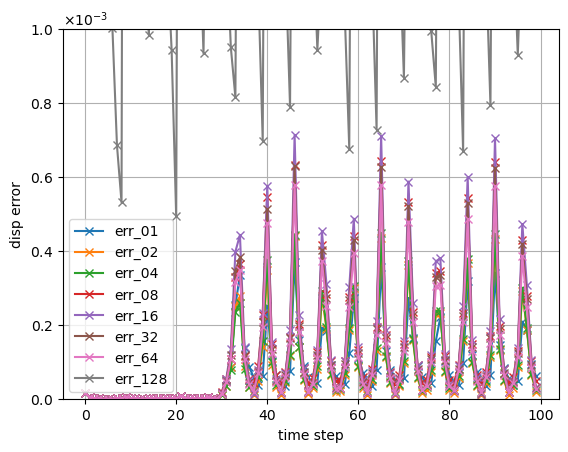

In [117]:
array = array.T
fig_3, ax_3 = plt.subplots()

ax_3.plot(array[:,0], marker='x', label="err_01")
ax_3.plot(array[:,1], marker='x', label="err_02")
ax_3.plot(array[:,2], marker='x', label="err_04")
ax_3.plot(array[:,3], marker='x', label="err_08")
ax_3.plot(array[:,4], marker='x', label="err_16")
ax_3.plot(array[:,5], marker='x', label="err_32")
ax_3.plot(array[:,6], marker='x', label="err_64")
ax_3.plot(array[:,7], marker='x', label="err_128")
ax_3.set_xlabel('time step')
ax_3.set_ylabel('disp error')
ax_3.legend(["err_01", "err_02", "err_04", "err_08", "err_16", "err_32", "err_64", "err_128"])
ax_3.grid()
ax_3.set_ylim(0.0, 0.001)
ax_3.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
# ax.set_xticks(mean_HROM)
# ax.set_xticklabels([2**i for i in range(0,len(mean_HROM))])
# ax.set_title('disp error')
plt.show()

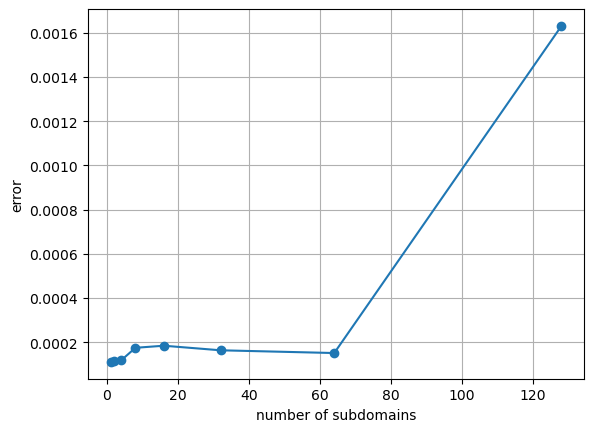

In [118]:
fig, ax = plt.subplots()
x = np.zeros(8)
for i in range(0,8,1):
    x[i] = 2**i

ax.plot(x, mean_HROM, marker='o')
ax.set_xlabel('number of subdomains')
ax.set_ylabel('error')
ax.grid()
ax_3.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
# ax.set_xscale('log')
# ax.set_xticks(mean_HROM)
# ax.set_xticklabels([2**i for i in range(0,len(mean_HROM))])
# ax.set_title('disp error')
plt.show()

# select elements of resuced mesh
this is a code that plot the number of select elements of reduced mesh.

read text file of select elements

In [119]:
file_name = 'select_elements.dat'
data = []

with open(file_name, 'r')as file:
    data = file.read()

print(data)
data = data.splitlines()
select_e = np.array(data, dtype=int)
print(select_e)


9
13
17
34
56
103
191
359

[  9  13  17  34  56 103 191 359]


plot select elements data

[  9  13  17  34  56 103 191]


ValueError: x and y must have same first dimension, but have shapes (8,) and (7,)

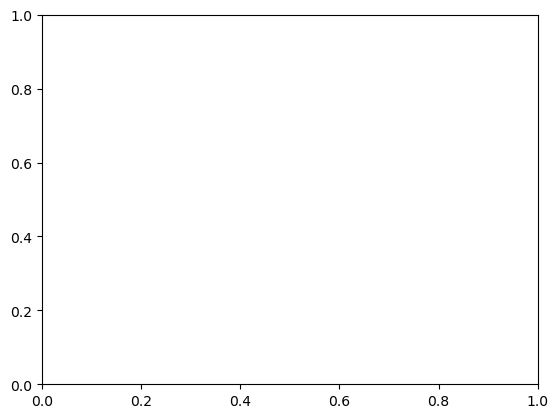

In [120]:
# select_e = np.delete(select_e, -1)
print(select_e)

fig2, ax2 = plt.subplots()
ax2.plot(x, select_e, marker='o')
ax2.set_xlabel('number of subdomains')
ax2.set_ylabel('number of select elements')
# ax2.set_xscale('log')
# ax2.set_yscale('log')
ax2.grid(which='major',color='gray',linestyle='-')
ax2.grid(which='minor',color='gray',linestyle='--')
plt.show()